# Import the necessary libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings('ignore')

# Read data

In [9]:
data = pd.read_csv("data.csv")
genre_data = pd.read_csv('data_by_genres.csv')
year_data = pd.read_csv('data_by_year.csv')


In [10]:
# Display the column names to ensure that the required columns exist
print(data.columns)
print(genre_data.columns)
print(year_data.columns)


Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')
Index(['mode', 'genres', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key'],
      dtype='object')
Index(['mode', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key'],
      dtype='object')


# Data exploration and analysis

In [11]:
print(data.head())
print(data.info())
print(data.describe())


   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH      

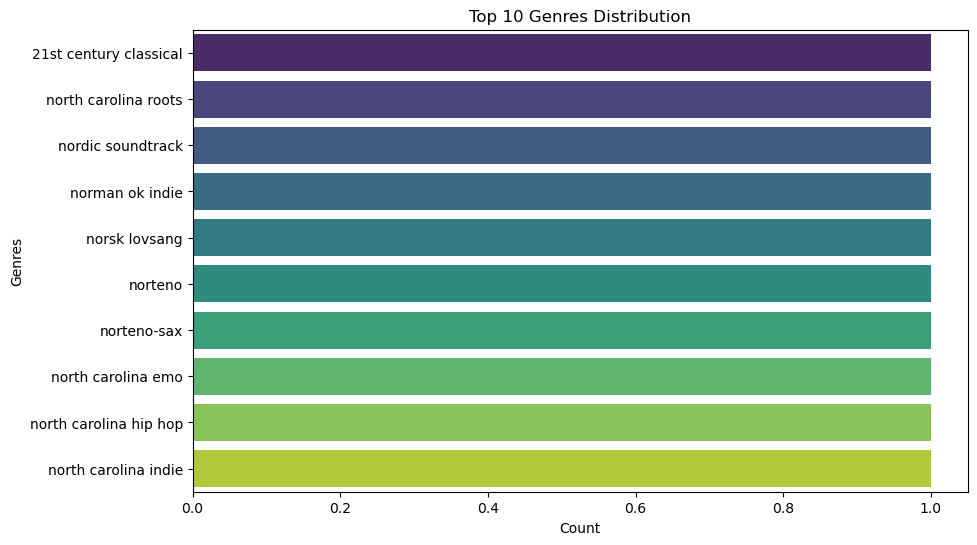

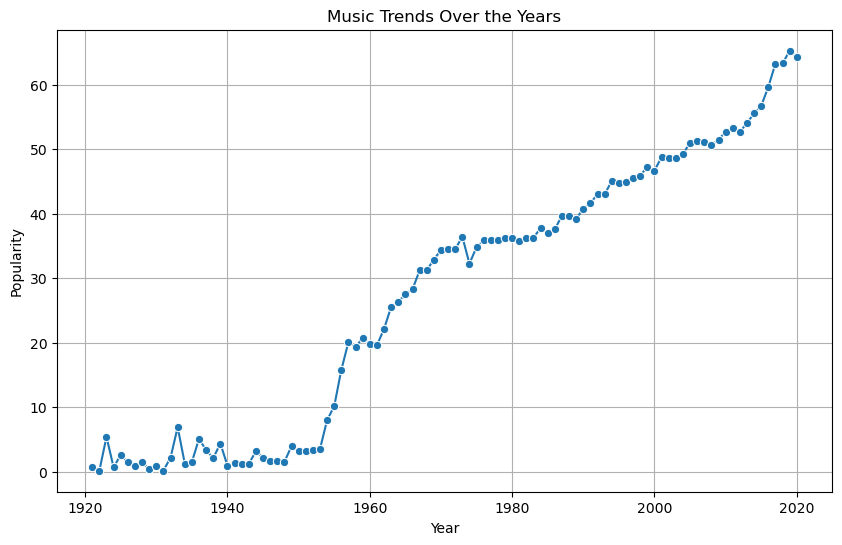

In [12]:
# Exploratory data analysis using bar plots
plt.figure(figsize=(10, 6))
genre_counts = genre_data['genres'].value_counts().head(10)  # Taking the top 10 types only for ease of presentation
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='viridis')
plt.title('Top 10 Genres Distribution')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

# Analyze exploratory data using line plots
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='popularity', data=year_data, marker='o')
plt.title('Music Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

In [13]:
# Take a sample of the data
sample_data = data.sample(frac=0.1, random_state=42)

# Preparing data for modeling

In [14]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = sample_data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Building a recommendation system 


In [15]:
# Use K-means to compile
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [16]:
# Evaluate the model with Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.15


In [17]:
# # View recommendation results
sample_data['cluster'] = clusters

def recommend_tracks(track_index):
    track_cluster = sample_data.iloc[track_index]['cluster']
    similar_tracks = sample_data[sample_data['cluster'] == track_cluster]
    return similar_tracks[['name', 'artists']]

# Test recommendation for some tracks
track_index = 0  # This indicator can be changed to test other paths
recommended_tracks = recommend_tracks(track_index)
print(f"Recommended tracks for track index {track_index}:")
print(recommended_tracks)


Recommended tracks for track index 0:
                                                     name  \
116368                                      Camby Bolongo   
112288                                      Soul Junction   
4298                                 Oogave Oogave Uyyala   
145224                                        The Phantom   
87560                                      Mister Sandman   
...                                                   ...   
111530                                   Habiby Fe Einaya   
45234                        The Best Thing For You Is Me   
50307                                             Stumped   
3242    Clarinet Lament, "Barney's Concerto": Clarinet...   
78833                                   So What (Hoo hah)   

                                              artists  
116368                             ['Idris Muhammad']  
112288                        ['Red Garland Quintet']  
4298                       ['Bhanumathi Ramakrishna']  
14522

### This code uses sample data (10% of the full data) to reduce the amount of data used to train the recommendation model. This can help avoid memory problems. You can modify the sample ratio (frac parameter) as needed to fit the amount of available memory.